# This notebook is to complete the 3.1 Python Statistics Assignment

 ## Fred Meckler, July 2023

### Below I can put my import statements

In [105]:
import pandas
import numpy as np
from scipy import stats
import statsmodels.api
from statsmodels.formula.api import ols
import seaborn

### Now I will read in the dataset

In [30]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
print(data)

    Unnamed: 0  Gender  FSIQ  VIQ  PIQ  Weight  Height  MRI_Count
0            1  Female   133  132  124   118.0    64.5     816932
1            2    Male   140  150  124     NaN    72.5    1001121
2            3    Male   139  123  150   143.0    73.3    1038437
3            4    Male   133  129  128   172.0    68.8     965353
4            5  Female   137  132  134   147.0    65.0     951545
5            6  Female    99   90  110   146.0    69.0     928799
6            7  Female   138  136  131   138.0    64.5     991305
7            8  Female    92   90   98   175.0    66.0     854258
8            9    Male    89   93   84   134.0    66.3     904858
9           10    Male   133  114  147   172.0    68.8     955466
10          11  Female   132  129  124   118.0    64.5     833868
11          12    Male   141  150  128   151.0    70.0    1079549
12          13    Male   135  129  124   155.0    69.0     924059
13          14  Female   140  120  147   155.0    70.5     856472
14        

### Creating the three arrays

In [4]:
t = np.linspace(-6, 6, 20)
sin_t = np.sin(t)
cos_t = np.cos(t)

### Displaying the arrays as a dataframe

In [5]:
pandas.DataFrame({'t': t, 'sin': sin_t, 'cos': cos_t})

,t,sin,cos
0,-6.000000,0.279415,0.960170
1,-5.368421,0.792419,0.609977
2,-4.736842,0.999701,0.024451
3,-4.105263,0.821291,-0.570509
4,-3.473684,0.326021,-0.945363
5,-2.842105,-0.295030,-0.955488
6,-2.210526,-0.802257,-0.596979
7,-1.578947,-0.999967,-0.008151
8,-0.947368,-0.811882,0.583822
9,-0.315789,-0.310567,0.950551


### Manipulating the data

In [6]:
data.shape    # 40 rows and 8 columns
data.columns  # It has columns   
print(data['Gender'])  # Columns can be addressed by name   
# Simpler selector
data[data['Gender'] == 'Female']['VIQ'].mean()

0     Female
1       Male
2       Male
3       Male
4     Female
5     Female
6     Female
7     Female
8       Male
9       Male
10    Female
11      Male
12      Male
13    Female
14    Female
15    Female
16    Female
17      Male
18    Female
19      Male
20      Male
21      Male
22    Female
23      Male
24    Female
25      Male
26    Female
27      Male
28    Female
29    Female
30    Female
31      Male
32      Male
33      Male
34    Female
35    Female
36      Male
37    Female
38      Male
39      Male
Name: Gender, dtype: object


109.45

### Split the dataframe by group, and see statistics

In [7]:
groupby_gender = data.groupby('Gender')
for gender, value in groupby_gender['VIQ']:
    print((gender, value.mean()))

('Female', 109.45)
('Male', 115.25)


### Showing means for many categories based on gender

In [8]:
groupby_gender.mean()

,Unnamed: 0,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,,
Female,19.65,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,21.35,115.0,115.25,111.60,166.444444,71.431579,954855.4


### Creating Scatterplots

array([[<Axes: xlabel='Weight', ylabel='Weight'>,
        <Axes: xlabel='Height', ylabel='Weight'>,
        <Axes: xlabel='MRI_Count', ylabel='Weight'>],
       [<Axes: xlabel='Weight', ylabel='Height'>,
        <Axes: xlabel='Height', ylabel='Height'>,
        <Axes: xlabel='MRI_Count', ylabel='Height'>],
       [<Axes: xlabel='Weight', ylabel='MRI_Count'>,
        <Axes: xlabel='Height', ylabel='MRI_Count'>,
        <Axes: xlabel='MRI_Count', ylabel='MRI_Count'>]], dtype=object)

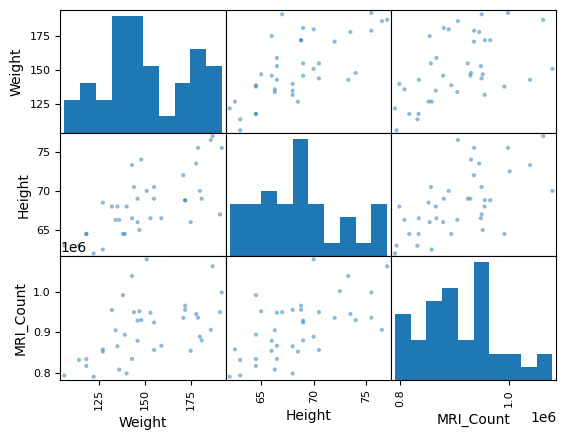

In [9]:
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']])

array([[<Axes: xlabel='PIQ', ylabel='PIQ'>,
        <Axes: xlabel='VIQ', ylabel='PIQ'>,
        <Axes: xlabel='FSIQ', ylabel='PIQ'>],
       [<Axes: xlabel='PIQ', ylabel='VIQ'>,
        <Axes: xlabel='VIQ', ylabel='VIQ'>,
        <Axes: xlabel='FSIQ', ylabel='VIQ'>],
       [<Axes: xlabel='PIQ', ylabel='FSIQ'>,
        <Axes: xlabel='VIQ', ylabel='FSIQ'>,
        <Axes: xlabel='FSIQ', ylabel='FSIQ'>]], dtype=object)

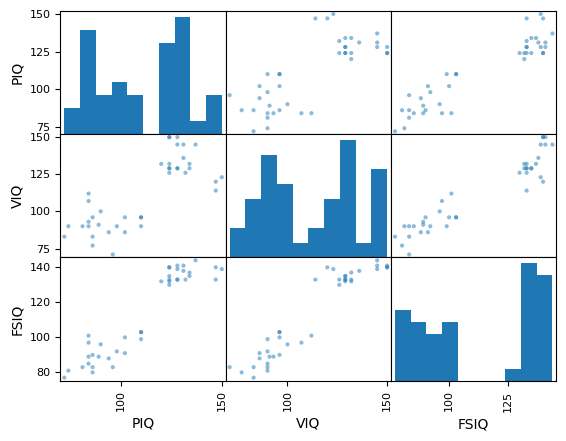

In [10]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']])

### Hypothesis Testing - T-test

In [11]:
stats.ttest_1samp(data['VIQ'], 0)

TtestResult(statistic=30.08809997084933, pvalue=1.3289196468727879e-28, df=39)

### Hypothesis Testing - 2 sample t-test

In [12]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)

TtestResult(statistic=-0.7726161723275012, pvalue=0.44452876778583217, df=38.0)

### Paired T-test

In [13]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

In [14]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [15]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)

TtestResult(statistic=1.7842019405859857, pvalue=0.08217263818364236, df=39)

In [16]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])

/srv/conda/envs/notebook/lib/python3.11/site-packages/scipy/stats/_morestats.py:4088: UserWarning: Exact p-value calculation does not work if there are zeros. Switching to normal approximation.
  warnings.warn("Exact p-value calculation does not work if there are "


WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

### Linear Modelling

In [17]:
x = np.linspace(-5, 5, 20)
np.random.seed(1)
# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
# Create a data frame containing all the relevant variables
data = pandas.DataFrame({'x': x, 'y': y})

In [19]:
model = ols("y ~ x", data).fit()

In [20]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Tue, 11 Jul 2023   Prob (F-statistic):           8.56e-08
Time:                        17:48:04   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

### Categorical Variables

In [23]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")

In [24]:
model = ols("VIQ ~ Gender + 1", data).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Tue, 11 Jul 2023   Prob (F-statistic):              0.445
Time:                        17:50:47   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

In [25]:
model = ols('VIQ ~ C(Gender)', data).fit()

In [26]:
data_fisq = pandas.DataFrame({'iq': data['FSIQ'], 'type': 'fsiq'})
data_piq = pandas.DataFrame({'iq': data['PIQ'], 'type': 'piq'})
data_long = pandas.concat((data_fisq, data_piq))
print(data_long)  

     iq  type
0   133  fsiq
1   140  fsiq
2   139  fsiq
3   133  fsiq
4   137  fsiq
..  ...   ...
35  128   piq
36  124   piq
37   94   piq
38   74   piq
39   89   piq

[80 rows x 2 columns]


In [27]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])   

TtestResult(statistic=0.465637596380964, pvalue=0.6427725009414841, df=78.0)

### Multiple Regression in Iris data

In [108]:
data = pandas.read_csv('iris.csv')
print(data)
model = ols('sepal_width ~ name + petal_length', data).fit()
print(model.summary())  

     sepal_length  sepal_width  petal_length  petal_width       name
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]
                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                   

### Anova

In [109]:
print(model.f_test([0, 1, -1, 0]))

<F test: F=3.2453353465741173, p=0.07369058781701415, df_denom=146, df_num=1>


### Anova for brain data

In [106]:
data = pandas.read_csv('brain_size.csv', sep=';', na_values=".")
model = ols('VIQ ~ Gender + MRI_Count + Height', data).fit()
print(model.summary())
print(data)

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.181
Method:                 Least Squares   F-statistic:                     3.809
Date:                Thu, 13 Jul 2023   Prob (F-statistic):             0.0184
Time:                        14:06:25   Log-Likelihood:                -172.34
No. Observations:                  39   AIC:                             352.7
Df Residuals:                      35   BIC:                             359.3
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        166.6258     88.824      1.

In [107]:
print(model.f_test([0, 1, 0, 0]))

<F test: F=0.6831960845842293, p=0.4140878441244694, df_denom=35, df_num=1>


### Wages and Personal Information 

In [112]:
data = pandas.read_csv('Wagedata.csv')
print(data)

     EDUCATION  SOUTH  SEX  EXPERIENCE  UNION   WAGE  AGE  RACE  OCCUPATION  \
0            8      0    1          21      0   5.10   35     2           6   
1            9      0    1          42      0   4.95   57     3           6   
2           12      0    0           1      0   6.67   19     3           6   
3           12      0    0           4      0   4.00   22     3           6   
4           12      0    0          17      0   7.50   35     3           6   
..         ...    ...  ...         ...    ...    ...  ...   ...         ...   
529         18      0    0           5      0  11.36   29     3           5   
530         12      0    1          33      0   6.10   51     1           5   
531         17      0    1          25      1  23.25   48     1           5   
532         12      1    0          13      1  19.88   31     3           5   
533         16      0    0          33      0  15.38   55     3           5   

      SECTOR  MARR  Unnamed: 11  Unnamed: 12  Unnam

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


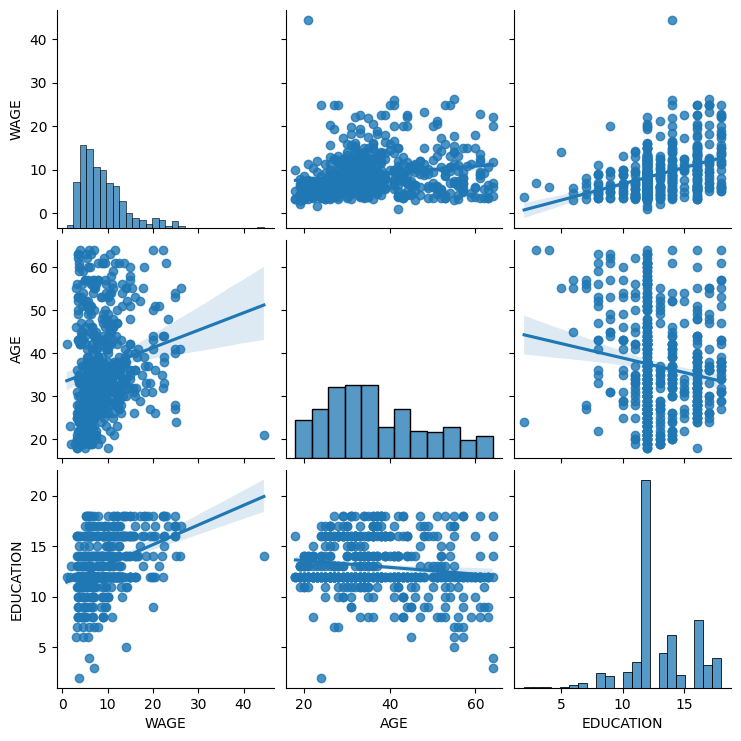

In [66]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'], 
                 kind='reg')  

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


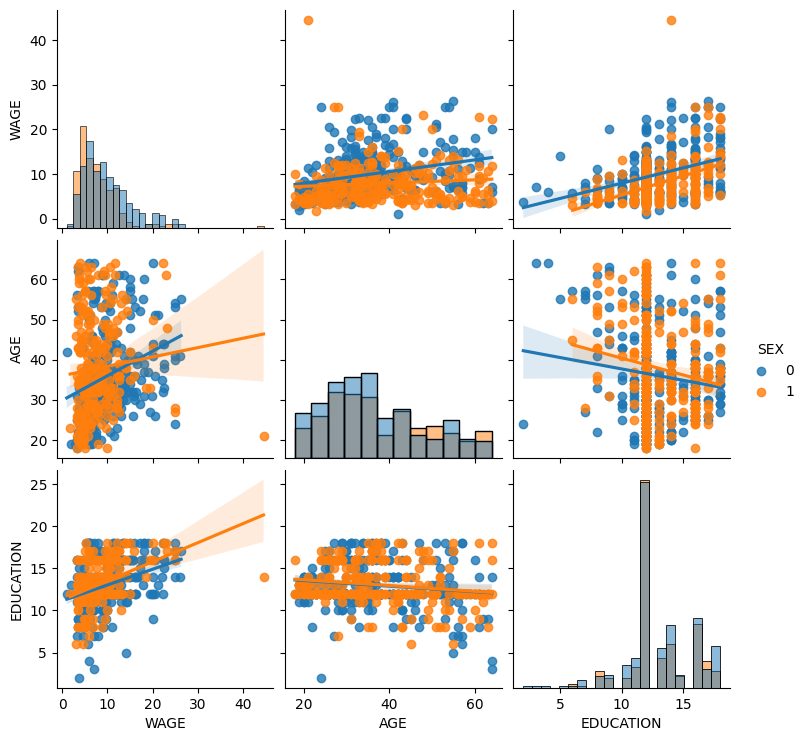

In [84]:
seaborn.pairplot(data, vars=['WAGE', 'AGE', 'EDUCATION'],
                 kind='reg', hue='SEX', diag_kind="hist") 

In [68]:
## Seaborn package has a particular "more modern look". In order to go back to the traditional matplotlib look
## use the following command. 
from matplotlib import pyplot as plt
plt.rcdefaults()

/srv/conda/envs/notebook/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


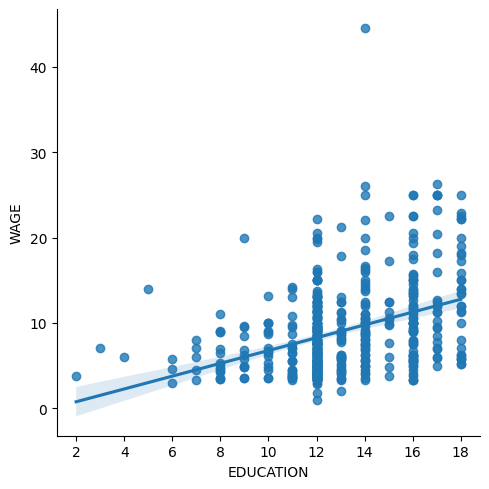

In [69]:
seaborn.lmplot(y='WAGE', x='EDUCATION', data=data)  

### Testing for interactions

In [134]:
import statsmodels.formula.api as sm
result = sm.ols(formula='WAGE ~ EDUCATION + SEX + EDUCATION * SEX', data=data).fit()    
print(result.summary()) 
print(data)

                            OLS Regression Results                            
Dep. Variable:                   WAGE   R-squared:                       0.190
Model:                            OLS   Adj. R-squared:                  0.186
Method:                 Least Squares   F-statistic:                     41.50
Date:                Thu, 13 Jul 2023   Prob (F-statistic):           4.24e-24
Time:                        14:31:08   Log-Likelihood:                -1575.0
No. Observations:                 534   AIC:                             3158.
Df Residuals:                     530   BIC:                             3175.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.1046      1.314      0.841

In [140]:
print(model.f_test([0, 0, 1, 0]))

<F test: F=42.27832473752249, p=1.1778442281644361e-09, df_denom=146, df_num=1>
